In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [2]:
splits = {
    "java_train": "data/java_train-00000-of-00001.parquet",
    "java_test": "data/java_test-00000-of-00001.parquet",
    "python_train": "data/python_train-00000-of-00001.parquet",
    "python_test": "data/python_test-00000-of-00001.parquet",
    "pharo_train": "data/pharo_train-00000-of-00001.parquet",
    "pharo_test": "data/pharo_test-00000-of-00001.parquet"
}

java_train_df = pd.read_parquet("hf://datasets/NLBSE/nlbse25-code-comment-classification/" + splits["java_train"])
java_test_df = pd.read_parquet("hf://datasets/NLBSE/nlbse25-code-comment-classification/" + splits["java_test"])
python_train_df = pd.read_parquet("hf://datasets/NLBSE/nlbse25-code-comment-classification/" + splits["python_train"])
python_test_df = pd.read_parquet("hf://datasets/NLBSE/nlbse25-code-comment-classification/" + splits["python_test"])
pharo_train_df = pd.read_parquet("hf://datasets/NLBSE/nlbse25-code-comment-classification/" + splits["pharo_train"])
pharo_test_df = pd.read_parquet("hf://datasets/NLBSE/nlbse25-code-comment-classification/" + splits["pharo_test"])

In [3]:
print("Number of instances in the java train dataset:", java_train_df.shape[0])
print("Number of instances in the java test dataset:", java_test_df.shape[0])
print("Number of instances in the python train dataset:", python_train_df.shape[0])
print("Number of instances in the python test dataset:", python_test_df.shape[0])
print("Number of instances in the pharo train dataset:", pharo_train_df.shape[0])
print("Number of instances in the pharo test dataset:", pharo_test_df.shape[0])

Number of instances in the java train dataset: 7614
Number of instances in the java test dataset: 1725
Number of instances in the python train dataset: 1884
Number of instances in the python test dataset: 406
Number of instances in the pharo train dataset: 1298
Number of instances in the pharo test dataset: 289


In [4]:
java_train_df.sample(5)

,index,class,comment_sentence,partition,combo,labels
4164,7046,CleanerTask.java,restore the interrupt,0,restore the interrupt | CleanerTask.java,"[1, 0, 0, 0, 0, 0, 0]"
4277,7162,VTooltip.java,* Returns the unique id of the tooltip el...,0,* Returns the unique id of the tooltip el...,"[1, 0, 0, 0, 0, 0, 0]"
3637,6500,AutoconfEditor.java,* @return a scanner for creating Autoconf...,0,* @return a scanner for creating Autoconf...,"[0, 0, 0, 1, 0, 0, 0]"
7320,10356,TestFileSystem.java,// multiple invocations of FileSystem.get ...,0,// multiple invocations of FileSystem.get ...,"[1, 0, 0, 0, 0, 0, 0]"
97,171,ErasureCodingPolicyManager.java,this class is instantiated by the fsnamesystem.,0,this class is instantiated by the fsnamesystem...,"[0, 0, 0, 1, 1, 0, 0]"


In [5]:
java_test_df.sample(5)

,index,class,comment_sentence,partition,combo,labels
414,2670,ICPPASTTemplatedTypeTemplateParameter.java,/**\n\t * Get default value for template templ...,1,/**\n\t * Get default value for template templ...,"[1, 0, 0, 0, 0, 0, 0]"
155,1289,GwtTestSuite.java,grouping them into a suite is much faster than...,1,grouping them into a suite is much faster than...,"[0, 0, 0, 0, 0, 0, 1]"
1086,3428,AddressTypes.java,Enum of address types -as integers.,1,Enum of address types -as integers. | AddressT...,"[1, 0, 0, 0, 0, 0, 0]"
654,2943,IIndex.java,"@see #findIncludes(IIndexFile, int)",1,"@see #findIncludes(IIndexFile, int) | IIndex.java","[0, 0, 0, 0, 1, 0, 0]"
1010,3343,TestTriggerBlockReport.java,/**\n * Test manually requesting that the Data...,1,/**\n * Test manually requesting that the Data...,"[1, 0, 0, 0, 0, 0, 0]"


In [6]:
python_train_df.sample(5)

,index,class,comment_sentence,partition,combo,labels
213,298,Operation,base class for migration operations.,0,base class for migration operations. | Operation,"[0, 0, 0, 0, 1]"
1219,1724,Retry,param int read,0,param int read | Retry,"[0, 1, 0, 0, 0]"
1757,2445,SGD,"dampening float, optional dampening for moment...",0,"dampening float, optional dampening for moment...","[0, 1, 0, 0, 0]"
1850,2593,Unfold,"output math n, c times prod text kernel size ,...",0,"output math n, c times prod text kernel size ,...","[1, 0, 0, 1, 0]"
1518,2134,Conv3d,"at groups 2, the operation becomes equivalent ...",0,"at groups 2, the operation becomes equivalent ...","[0, 0, 0, 0, 1]"


In [7]:
python_test_df.sample(5)

,index,class,comment_sentence,partition,combo,labels
203,1225,Environment,the default is n which is a,1,the default is n which is a | Environment,"[0, 1, 0, 0, 0]"
21,32,AutoFieldMeta,a new flag needs,1,a new flag needs | AutoFieldMeta,"[1, 0, 0, 0, 0]"
56,251,MigrationLoader,this does mean that this class must also talk ...,1,this does mean that this class must also talk ...,"[1, 0, 0, 0, 0]"
24,45,BaseCommand,if you are interested in overriding customizin...,1,if you are interested in overriding customizin...,"[1, 0, 0, 0, 0]"
77,409,Audio,"if a filename or url is used, the format suppo...",1,"if a filename or url is used, the format suppo...","[0, 1, 0, 0, 0]"


In [8]:
pharo_train_df.sample(5)

,index,class,comment_sentence,partition,combo,labels
1116,1582,RTWeightedCircleLayout,v rtview new.,0,v rtview new. | RTWeightedCircleLayout,"[0, 1, 0, 0, 0, 0, 0]"
374,525,GtGraphTreemapSquarify,example gtgraphtreemaplayoutexamples #squarify...,0,example gtgraphtreemaplayoutexamples #squarify...,"[0, 1, 0, 0, 0, 0, 0]"
820,1159,PMGradient,computes the gradient of a function of a colle...,0,computes the gradient of a function of a colle...,"[0, 0, 1, 0, 0, 0, 0]"
499,705,SpartaLine,from get my start point,0,from get my start point | SpartaLine,"[0, 0, 0, 0, 0, 1, 0]"
226,324,BlTextElementMeasurementStrategyExamples,precise measurement,0,precise measurement | BlTextElementMeasurement...,"[0, 1, 0, 0, 0, 0, 0]"


In [9]:
pharo_test_df.sample(5)

,index,class,comment_sentence,partition,combo,labels
256,1633,WAComboResponse,"by default, wacomboresponse will buffer the en...",1,"by default, wacomboresponse will buffer the en...","[0, 0, 1, 0, 0, 0, 0]"
24,59,BlDecelerateInterpolator,increasing factor above 10f makes exaggerates ...,1,increasing factor above 10f makes exaggerates ...,"[1, 0, 0, 0, 0, 0, 0]"
178,1109,PRPhase,acollection,1,acollection | PRPhase,"[0, 1, 0, 0, 0, 0, 0]"
221,1345,RTFilterInView,b layout grid.,1,b layout grid. | RTFilterInView,"[0, 1, 0, 0, 0, 0, 0]"
233,1511,RTScrollBarBuilder,aving an orientation #vertical or #horizontal.,1,aving an orientation #vertical or #horizontal....,"[0, 0, 0, 0, 0, 1, 0]"


In [10]:
java_train_df.rename(columns={"index": "id", "combo": "text"}, inplace=True)
java_test_df.rename(columns={"index": "id", "combo": "text"}, inplace=True)

python_train_df.rename(columns={"index": "id", "combo": "text"}, inplace=True)
python_test_df.rename(columns={"index": "id", "combo": "text"}, inplace=True)

pharo_train_df.rename(columns={"index": "id", "combo": "text"}, inplace=True)
pharo_test_df.rename(columns={"index": "id", "combo": "text"}, inplace=True)

In [11]:
labels = {
    "java": ["summary", "ownership", "expand", "usage", "pointer", "deprecation", "rational"],
    "python": ["usage", "parameters", "developmentNotes", "expand", "Summary"],
    "pharo": ["keyimplementationpoints", "example", "responsibilities", "classreferences", "intent", "keymessages", "collaborators"]
}

def normalize(x, labels):    
    return {l: v for l, v in zip(labels, x)}

labels_df = pd.json_normalize(java_train_df["labels"].apply(lambda x: normalize(x, labels["java"])))  # type: ignore
labels_df.columns = ["label_" + c for c in labels_df.columns]
java_train_df = pd.concat([java_train_df, labels_df], axis=1)

labels_df = pd.json_normalize(java_test_df["labels"].apply(lambda x: normalize(x, labels["java"])))  # type: ignore
labels_df.columns = ["label_" + c for c in labels_df.columns]
java_test_df = pd.concat([java_test_df, labels_df], axis=1)

labels_df = pd.json_normalize(python_train_df["labels"].apply(lambda x: normalize(x, labels["python"])))  # type: ignore
labels_df.columns = ["label_" + c for c in labels_df.columns]
python_train_df = pd.concat([python_train_df, labels_df], axis=1)

labels_df = pd.json_normalize(python_test_df["labels"].apply(lambda x: normalize(x, labels["python"])))  # type: ignore
labels_df.columns = ["label_" + c for c in labels_df.columns]
python_test_df = pd.concat([python_test_df, labels_df], axis=1)

labels_df = pd.json_normalize(pharo_train_df["labels"].apply(lambda x: normalize(x, labels["pharo"])))  # type: ignore
labels_df.columns = ["label_" + c for c in labels_df.columns]
pharo_train_df = pd.concat([pharo_train_df, labels_df], axis=1)

labels_df = pd.json_normalize(pharo_test_df["labels"].apply(lambda x: normalize(x, labels["pharo"])))  # type: ignore
labels_df.columns = ["label_" + c for c in labels_df.columns]
pharo_test_df = pd.concat([pharo_test_df, labels_df], axis=1)

### Clean the data:

In [12]:
print("Number of missing text in the java train dataset:", java_train_df["text"].isnull().sum())
print("Number of missing text in the java test dataset:", java_test_df["text"].isnull().sum())

print("Number of missing text in the python train dataset:", python_train_df["text"].isnull().sum())
print("Number of missing text in the python test dataset:", python_test_df["text"].isnull().sum())

print("Number of missing text in the pharo train dataset:", pharo_train_df["text"].isnull().sum())
print("Number of missing text in the pharo test dataset:", pharo_test_df["text"].isnull().sum())

Number of missing text in the java train dataset: 0
Number of missing text in the java test dataset: 0
Number of missing text in the python train dataset: 0
Number of missing text in the python test dataset: 0
Number of missing text in the pharo train dataset: 0
Number of missing text in the pharo test dataset: 0


In [13]:
print("Number of missing labels in the java train dataset:")
for c in java_train_df.columns:
    if c.startswith("label_"):
        n_missing_labels = java_train_df[c].isnull().sum()
        if n_missing_labels > 0:
            print(f"- {c}:", n_missing_labels)

print("Number of missing labels in the java test dataset:")
for c in java_test_df.columns:
    if c.startswith("label_"):
        n_missing_labels = java_test_df[c].isnull().sum()
        if n_missing_labels > 0:
            print(f"- {c}:", n_missing_labels)

print("Number of missing labels in the python train dataset:")
for c in python_train_df.columns:
    if c.startswith("label_"):
        n_missing_labels = python_train_df[c].isnull().sum()
        if n_missing_labels > 0:
            print(f"- {c}:", n_missing_labels)

print("Number of missing labels in the python test dataset:")
for c in python_test_df.columns:
    if c.startswith("label_"):
        n_missing_labels = python_test_df[c].isnull().sum()
        if n_missing_labels > 0:
            print(f"- {c}:", n_missing_labels)

print("Number of missing labels in the pharo train dataset:")
for c in pharo_train_df.columns:
    if c.startswith("label_"):
        n_missing_labels = pharo_train_df[c].isnull().sum()
        if n_missing_labels > 0:
            print(f"- {c}:", n_missing_labels)

print("Number of missing labels in the pharo test dataset:")
for c in pharo_test_df.columns:
    if c.startswith("label_"):
        n_missing_labels = pharo_test_df[c].isnull().sum()
        if n_missing_labels > 0:
            print(f"- {c}:", n_missing_labels)

Number of missing labels in the java train dataset:
Number of missing labels in the java test dataset:
Number of missing labels in the python train dataset:
Number of missing labels in the python test dataset:
Number of missing labels in the pharo train dataset:
Number of missing labels in the pharo test dataset:


In [14]:
print(f"Number of duplicated text in the java train dataset: {java_train_df[["text"]].duplicated().sum()} ({java_train_df[["text"]].duplicated().sum()/java_train_df.shape[0]:.2%})")
print(f"Number of duplicated text in the java test dataset: {java_test_df[["text"]].duplicated().sum()} ({java_test_df[["text"]].duplicated().sum()/java_test_df.shape[0]:.2%})")

print(f"Number of duplicated text in the python train dataset: {python_train_df[["text"]].duplicated().sum()} ({python_train_df[["text"]].duplicated().sum()/python_train_df.shape[0]:.2%})")
print(f"Number of duplicated text in the python test dataset: {python_test_df[["text"]].duplicated().sum()} ({python_test_df[["text"]].duplicated().sum()/python_test_df.shape[0]:.2%})")

print(f"Number of duplicated text in the pharo train dataset: {pharo_train_df[["text"]].duplicated().sum()} ({pharo_train_df[["text"]].duplicated().sum()/pharo_train_df.shape[0]:.2%})")
print(f"Number of duplicated text in the pharo test dataset: {pharo_test_df[["text"]].duplicated().sum()} ({pharo_test_df[["text"]].duplicated().sum()/pharo_test_df.shape[0]:.2%})")

Number of duplicated text in the java train dataset: 794 (10.43%)
Number of duplicated text in the java test dataset: 143 (8.29%)
Number of duplicated text in the python train dataset: 46 (2.44%)
Number of duplicated text in the python test dataset: 0 (0.00%)
Number of duplicated text in the pharo train dataset: 17 (1.31%)
Number of duplicated text in the pharo test dataset: 3 (1.04%)


*WARNING: Duplicated texts is particularly high in the java datasets.*

### Analyze distributions:

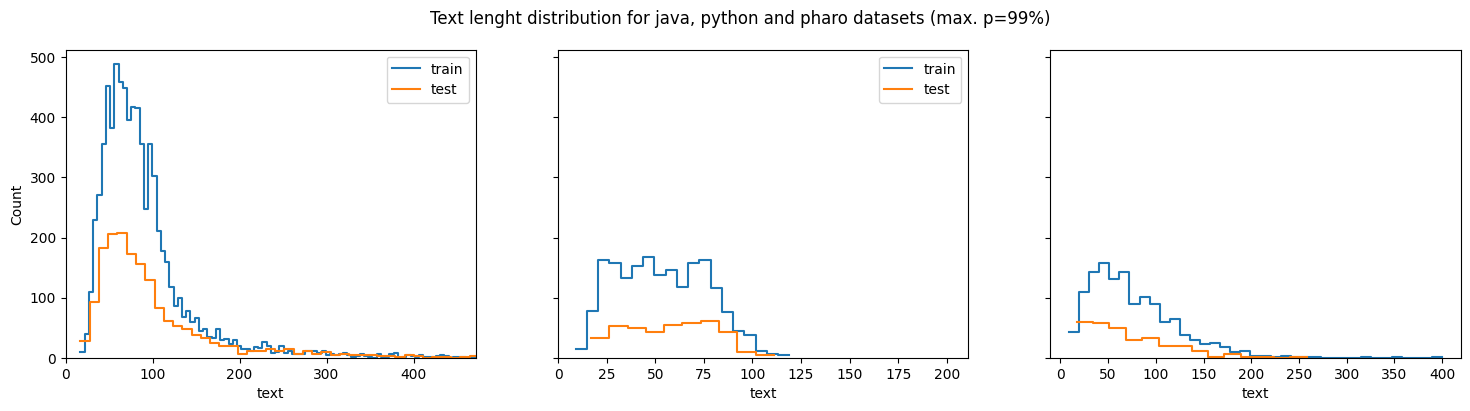

In [15]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 4))

sns.histplot(java_train_df["text"].str.len(), element="step", fill=False, ax=axes[0])
sns.histplot(java_test_df["text"].str.len(), element="step", fill=False, ax=axes[0])
axes[0].set_xlim([
    0,
    pd.concat([
        java_train_df["text"].str.len(),
        java_test_df["text"].str.len()
    ], axis=1, ignore_index=True).quantile(.99).max()
])
axes[0].legend(labels=["train", "test"])

sns.histplot(python_train_df["text"].str.len(), element="step", fill=False, ax=axes[1])
sns.histplot(python_test_df["text"].str.len(), element="step", fill=False, ax=axes[1])
axes[1].set_xlim([
    0,
    pd.concat([
        python_train_df["text"].str.len(),
        python_test_df["text"].str.len()
    ], axis=1, ignore_index=True).quantile(.99).max()
])
axes[1].legend(labels=["train", "test"])

sns.histplot(pharo_train_df["text"].str.len(), element="step", fill=False, ax=axes[2])
sns.histplot(pharo_test_df["text"].str.len(), element="step", fill=False, ax=axes[2])
axes[1].set_xlim([
    0,
    pd.concat([
        pharo_train_df["text"].str.len(),
        pharo_test_df["text"].str.len()
    ], axis=1, ignore_index=True).quantile(.99).max()
])
axes[1].legend(labels=["train", "test"])


plt.suptitle("Text lenght distribution for java, python and pharo datasets (max. p=99%)")
plt.show()

In [20]:
pd.concat([
    java_train_df[c].value_counts(dropna=False, normalize=True).round(2).to_frame(c.replace("label_", ""))
    for c in java_train_df.columns
    if c.startswith("label_")
], axis=1)

,summary,ownership,expand,usage,pointer,deprecation,rational
0,0.53,0.96,0.93,0.73,0.88,0.98,0.96
1,0.47,0.04,0.07,0.27,0.12,0.02,0.04


In [21]:
pd.concat([
    java_test_df[c].value_counts(dropna=False, normalize=True).round(2).to_frame(c.replace("label_", ""))
    for c in java_test_df.columns
    if c.startswith("label_")
], axis=1)

,summary,ownership,expand,usage,pointer,deprecation,rational
1,0.52,0.03,0.06,0.25,0.11,0.01,0.04
0,0.48,0.97,0.94,0.75,0.89,0.99,0.96


In [22]:
pd.concat([
    python_train_df[c].value_counts(dropna=False, normalize=True).round(2).to_frame(c.replace("label_", ""))
    for c in python_train_df.columns
    if c.startswith("label_")
], axis=1)

,usage,parameters,developmentNotes,expand,Summary
0,0.69,0.7,0.89,0.82,0.82
1,0.31,0.3,0.11,0.18,0.18


In [23]:
pd.concat([
    python_test_df[c].value_counts(dropna=False, normalize=True).round(2).to_frame(c.replace("label_", ""))
    for c in python_test_df.columns
    if c.startswith("label_")
], axis=1)

,usage,parameters,developmentNotes,expand,Summary
0,0.7,0.68,0.9,0.84,0.8
1,0.3,0.32,0.1,0.16,0.2


In [25]:
pd.concat([
    pharo_train_df[c].value_counts(dropna=False, normalize=True).round(2).to_frame(c.replace("label_", ""))
    for c in pharo_train_df.columns
    if c.startswith("label_")
], axis=1)

,keyimplementationpoints,example,responsibilities,classreferences,intent,keymessages,collaborators
0,0.86,0.58,0.81,0.96,0.88,0.84,0.94
1,0.14,0.42,0.19,0.04,0.12,0.16,0.06


In [24]:
pd.concat([
    pharo_test_df[c].value_counts(dropna=False, normalize=True).round(2).to_frame(c.replace("label_", ""))
    for c in pharo_test_df.columns
    if c.startswith("label_")
], axis=1)

,keyimplementationpoints,example,responsibilities,classreferences,intent,keymessages,collaborators
0,0.85,0.59,0.82,0.99,0.9,0.85,0.97
1,0.15,0.41,0.18,0.01,0.1,0.15,0.03


*WARNING: Some classes are highly imbalanced.*

In [26]:
java_train_df[[c for c in java_train_df.columns if c.startswith("label_")]].sum(axis=1).value_counts(normalize=True)

1    0.976097
2    0.021933
3    0.001970
Name: proportion, dtype: float64

In [27]:
java_test_df[[c for c in java_test_df.columns if c.startswith("label_")]].sum(axis=1).value_counts(normalize=True)

1    0.993043
2    0.006957
Name: proportion, dtype: float64

In [28]:
python_train_df[[c for c in python_train_df.columns if c.startswith("label_")]].sum(axis=1).value_counts(normalize=True)

1    0.916667
2    0.078556
3    0.004777
Name: proportion, dtype: float64

In [29]:
python_test_df[[c for c in python_test_df.columns if c.startswith("label_")]].sum(axis=1).value_counts(normalize=True)

1    0.931034
2    0.064039
3    0.004926
Name: proportion, dtype: float64

In [30]:
pharo_train_df[[c for c in pharo_train_df.columns if c.startswith("label_")]].sum(axis=1).value_counts(normalize=True)

1    0.897535
2    0.083975
3    0.016949
4    0.001541
Name: proportion, dtype: float64

In [31]:
pharo_test_df[[c for c in pharo_test_df.columns if c.startswith("label_")]].sum(axis=1).value_counts(normalize=True)

1    0.958478
2    0.041522
Name: proportion, dtype: float64

### Persist datasets:

In [32]:
java_df = pd.concat([java_train_df, java_test_df], ignore_index=True)
python_df = pd.concat([python_train_df, python_test_df], ignore_index=True)
pharo_df = pd.concat([pharo_train_df, pharo_test_df], ignore_index=True)

In [33]:
print(f"Number of duplicated texts in the entire java dataset: {java_df["text"].duplicated().sum()} ({java_df["text"].duplicated().sum()/java_df.shape[0]:.2%})")
print(f"Number of duplicated texts in the entire python dataset: {python_df["text"].duplicated().sum()} ({python_df["text"].duplicated().sum()/python_df.shape[0]:.2%})")
print(f"Number of duplicated texts in the entire pharo dataset: {pharo_df["text"].duplicated().sum()} ({pharo_df["text"].duplicated().sum()/pharo_df.shape[0]:.2%})")

Number of duplicated texts in the entire java dataset: 937 (10.03%)
Number of duplicated texts in the entire python dataset: 46 (2.01%)
Number of duplicated texts in the entire pharo dataset: 20 (1.26%)


In [34]:
java_df[["id", "text"] + [c for c in java_df.columns if c.startswith("label_")]].to_parquet("./comment_type_java.parquet", index=False)
python_df[["id", "text"] + [c for c in python_df.columns if c.startswith("label_")]].to_parquet("./comment_type_python.parquet", index=False)
pharo_df[["id", "text"] + [c for c in pharo_df.columns if c.startswith("label_")]].to_parquet("./comment_type_pharo.parquet", index=False)

In [35]:
print("Number of instances in the persisted java dataset:", java_df.shape[0])
print("Number of instances in the persisted python dataset:", python_df.shape[0])
print("Number of instances in the persisted pharo dataset:", pharo_df.shape[0])

Number of instances in the persisted java dataset: 9339
Number of instances in the persisted python dataset: 2290
Number of instances in the persisted pharo dataset: 1587
